In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import data_preparation as dp

In [3]:
df = dp.full_clean("../data/Aviation_Data.csv","../data/Aviation_Data_Cleaned.csv")
df

/Users/willbennett/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,event_id,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,passenger_count
7,20020909X01562,1982-01-01,"PULLMAN, WA",Unknown,BLACKBURN AG STRIP,Non-Fatal,Substantial,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,2.0
8,20020909X01561,1982-01-01,"EAST HANOVER, NJ",N58,HANOVER,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,2.0
9,20020909X01560,1982-01-01,"JACKSONVILLE, FL",JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,North American,NAVION L-17B,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,3.0
10,20020909X01559,1982-01-01,"HOBBS, NM",Unknown,Unknown,Non-Fatal,Substantial,Piper,PA-28-161,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,1.0
11,20020909X01558,1982-01-01,"TUSKEGEE, AL",Unknown,TUSKEGEE,Non-Fatal,Substantial,Beech,V35B,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,20221221106483,2022-12-21,"Auburn Hills, MI",Unknown,Unknown,Minor,Unknown,Cessna,172F,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,1.0
90341,20221222106486,2022-12-21,"Reserve, LA",Unknown,Unknown,Minor,Unknown,Grumman American Avn. Corp.,AA-5B,1.0,Reciprocating,Instructional,0.0,1.0,0.0,1.0,Unknown,Unknown,2.0
90343,20221227106491,2022-12-26,"Annapolis, MD",Unknown,Unknown,Minor,Unknown,Piper,PA-28-151,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,1.0
90345,20221227106497,2022-12-26,"Payson, AZ",PAN,PAYSON,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72946 entries, 7 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                72946 non-null  object        
 1   event_date              72946 non-null  datetime64[ns]
 2   location                72946 non-null  object        
 3   airport_code            72946 non-null  object        
 4   airport_name            72946 non-null  object        
 5   injury_severity         72946 non-null  object        
 6   aircraft_damage         72946 non-null  object        
 7   make                    72946 non-null  object        
 8   model                   72946 non-null  object        
 9   number_of_engines       72439 non-null  float64       
 10  engine_type             72946 non-null  object        
 11  purpose_of_flight       72946 non-null  object        
 12  total_fatal_injuries    72946 non-null  float6

In [5]:
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,passenger_count
count,72439.000000,72946.000000,72946.000000,72946.000000,72946.000000,72946.000000
mean,1.140905,0.361898,0.221671,0.295698,4.234722,5.113988
std,0.449879,2.373695,1.115937,1.272226,22.785679,23.182628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000,699.000000


In [6]:
df.describe(include=object)

,event_id,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,engine_type,purpose_of_flight,weather_condition,broad_phase_of_flight
count,72946,72946,72946,72946,72946,72946,72946,72946,72946,72946,72946,72946
unique,72946,21533,9099,22076,56,4,1762,7796,12,26,5,12
top,20001212X24070,"ANCHORAGE, AK",Unknown,Unknown,Non-Fatal,Substantial,Cessna,152,Reciprocating,Personal,VMC,Unknown
freq,1,412,29567,27345,58360,55031,25445,2264,61111,40785,66314,18610


In [7]:
df.groupby(['make','model'])['event_id'].count().sort_values(ascending=False)[:10]

make    model    
Cessna  152          2264
        172          1613
        172N         1111
Piper   PA-28-140     895
Cessna  150           780
        172M          755
        172P          666
        180           612
        182           585
Piper   PA-18         574
Name: event_id, dtype: int64

<AxesSubplot:>

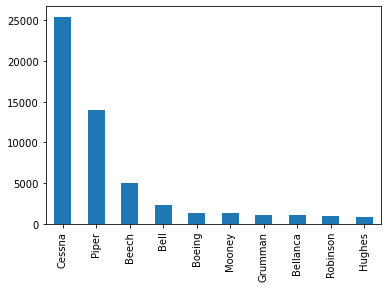

In [8]:
df['make'].value_counts()[:10].plot.bar()

Need to clean case redundancies

<AxesSubplot:>

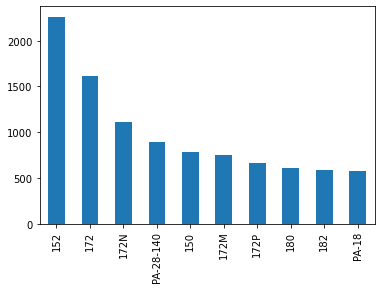

In [9]:
df['model'].value_counts()[:10].plot.bar()

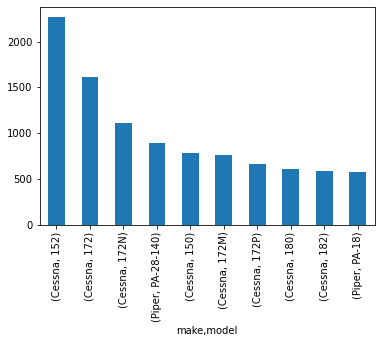

In [10]:
df[['make','model']].value_counts()[:10].plot.bar();

Observation:
- Cessna appears to have a high incidence of accidents

In [11]:
df['aircraft_damage'].value_counts()

Substantial    55031
Destroyed      14116
Minor           1927
Unknown         1872
Name: aircraft_damage, dtype: int64

In [12]:
df['fatality_rate'] = df['total_fatal_injuries']/df['passenger_count']

In [13]:
df

,event_id,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,passenger_count,fatality_rate
7,20020909X01562,1982-01-01,"PULLMAN, WA",Unknown,BLACKBURN AG STRIP,Non-Fatal,Substantial,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,2.0,0.0
8,20020909X01561,1982-01-01,"EAST HANOVER, NJ",N58,HANOVER,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,2.0,0.0
9,20020909X01560,1982-01-01,"JACKSONVILLE, FL",JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,North American,NAVION L-17B,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,3.0,0.0
10,20020909X01559,1982-01-01,"HOBBS, NM",Unknown,Unknown,Non-Fatal,Substantial,Piper,PA-28-161,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,1.0,0.0
11,20020909X01558,1982-01-01,"TUSKEGEE, AL",Unknown,TUSKEGEE,Non-Fatal,Substantial,Beech,V35B,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,20221221106483,2022-12-21,"Auburn Hills, MI",Unknown,Unknown,Minor,Unknown,Cessna,172F,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,1.0,0.0
90341,20221222106486,2022-12-21,"Reserve, LA",Unknown,Unknown,Minor,Unknown,Grumman American Avn. Corp.,AA-5B,1.0,Reciprocating,Instructional,0.0,1.0,0.0,1.0,Unknown,Unknown,2.0,0.0
90343,20221227106491,2022-12-26,"Annapolis, MD",Unknown,Unknown,Minor,Unknown,Piper,PA-28-151,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,Unknown,Unknown,1.0,0.0
90345,20221227106497,2022-12-26,"Payson, AZ",PAN,PAYSON,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,1.0,0.0


In [40]:
top_makes_list = df['make'].value_counts().nlargest(10).index.tolist()
top_makes_list

['Cessna',
 'Piper',
 'Beech',
 'Bell',
 'Boeing',
 'Mooney',
 'Grumman',
 'Bellanca',
 'Robinson',
 'Hughes']

In [41]:
top_makes_filter = df['make'].isin(top_makes_list)

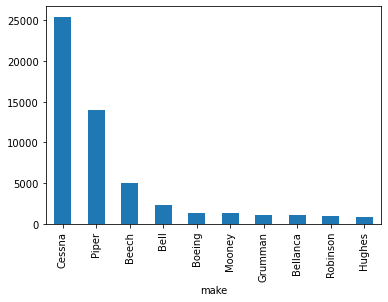

In [102]:
df[top_makes_filter].groupby('make')['event_id'].count().sort_values(ascending=False).plot.bar();

In [67]:
top_models_list = df['model'].value_counts().nlargest(20).index.tolist()
top_models_list

['152',
 '172',
 '172N',
 'PA-28-140',
 '150',
 '172M',
 '172P',
 '180',
 '182',
 'PA-18',
 'PA-18-150',
 '150M',
 'PA-28-180',
 'PA-28-161',
 'PA-28-181',
 '206B',
 'G-164A',
 'PA-38-112',
 '150L',
 'A36']

In [68]:
top_models_filter = df['model'].isin(top_models_list)

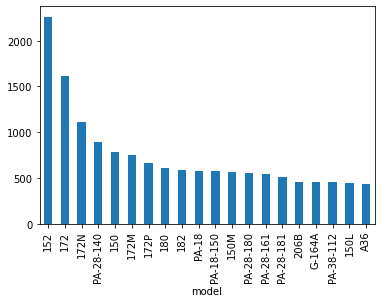

In [101]:
df[top_models_filter].groupby('model')['event_id'].count().sort_values(ascending=False).plot.bar();

In [48]:
df[top_makes_filter].groupby('make')['fatality_rate'].mean().sort_values(ascending=False)

make
Mooney      0.243713
Beech       0.238532
Bellanca    0.184295
Piper       0.169378
Cessna      0.127346
Robinson    0.126259
Bell        0.124855
Hughes      0.091571
Grumman     0.083713
Boeing      0.027613
Name: fatality_rate, dtype: float64

In [43]:
df.corr()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,passenger_count,fatality_rate,event_year
number_of_engines,1.000000,0.083907,0.037240,0.086163,0.387918,0.396367,0.050421,-0.026245
total_fatal_injuries,0.083907,1.000000,0.121052,0.076387,-0.023667,0.089148,0.335727,-0.016360
total_serious_injuries,0.037240,0.121052,1.000000,0.305977,0.039210,0.115862,-0.048712,0.028577
total_minor_injuries,0.086163,0.076387,0.305977,1.000000,0.143908,0.218873,-0.082052,-0.042176
total_uninjured,0.387918,-0.023667,0.039210,0.143908,1.000000,0.990239,-0.078185,0.015645
passenger_count,0.396367,0.089148,0.115862,0.218873,0.990239,1.000000,-0.049319,0.012763
fatality_rate,0.050421,0.335727,-0.048712,-0.082052,-0.078185,-0.049319,1.000000,-0.022048
event_year,-0.026245,-0.016360,0.028577,-0.042176,0.015645,0.012763,-0.022048,1.000000


<AxesSubplot:xlabel='passenger_count', ylabel='total_fatal_injuries'>

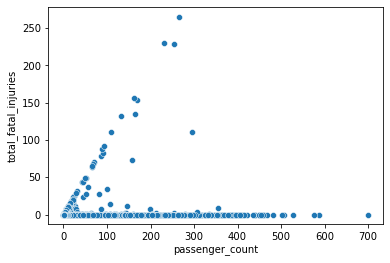

In [49]:
df.groupby('passenger_count').count()

sns.scatterplot(data=df, x='passenger_count', y='total_fatal_injuries')

In [50]:
df['event_year'] = df['event_date'].dt.year

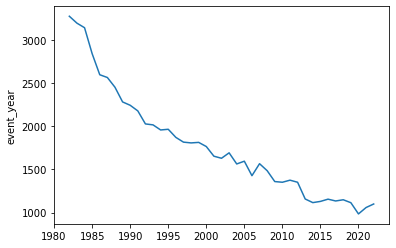

In [51]:
# Accidents over time
data = df['event_year'].value_counts()
sns.lineplot(data=data);

In [52]:
data = df[top_makes_filter].groupby(['make', 'event_year']).count().reset_index()
data[['make', 'event_year', 'event_id']]

,make,event_year,event_id
0,Beech,1982,252
1,Beech,1983,237
2,Beech,1984,221
3,Beech,1985,202
4,Beech,1986,159
...,...,...,...
405,Robinson,2018,23
406,Robinson,2019,42
407,Robinson,2020,25
408,Robinson,2021,3


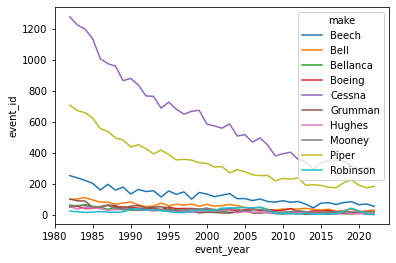

In [53]:
# Accidents over time for top makes
g = sns.lineplot(data=data, x="event_year", y="event_id", hue="make")


In [85]:
data = df[top_makes_filter & top_models_filter].groupby(['make','model'])['event_id'].count().reset_index()
data

,make,model,event_id
0,Beech,A36,401
1,Bell,206B,453
2,Cessna,150,780
3,Cessna,150L,441
4,Cessna,150M,564
5,Cessna,152,2264
6,Cessna,172,1613
7,Cessna,172M,755
8,Cessna,172N,1111
9,Cessna,172P,666


In [106]:
pivot_table_make_model = pd.pivot_table(df[top_makes_filter & top_models_filter], 
                                        values='passenger_count', 
                                        index='model', 
                                        columns='make', 
                                        aggfunc='count')

In [104]:
pivot_data = pivot_table_make_model.sort_values(by=list(pivot_table_make_model.columns), ascending=False)
pivot_data

make,Beech,Bell,Cessna,Grumman,Piper
model,,,,,
A36,401.0,NaN,NaN,NaN,NaN
206B,NaN,453.0,2.0,NaN,NaN
152,NaN,NaN,2264.0,NaN,NaN
172,NaN,NaN,1613.0,NaN,NaN
172N,NaN,NaN,1111.0,NaN,NaN
150,NaN,NaN,780.0,NaN,NaN
172M,NaN,NaN,755.0,NaN,NaN
172P,NaN,NaN,666.0,NaN,NaN
180,NaN,NaN,612.0,NaN,1.0


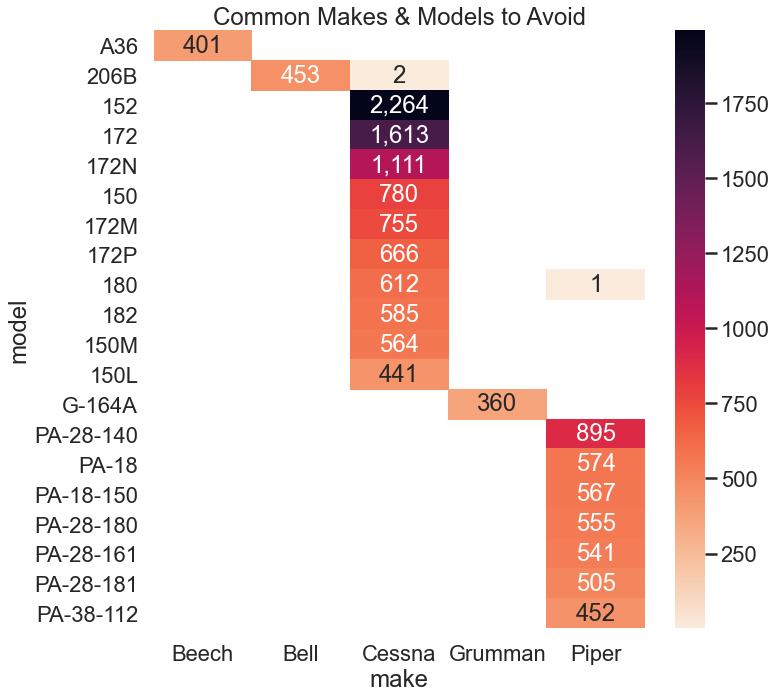

In [167]:
# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(11, 11))
sns.set_theme(style="white")
sns.set_context("poster")
cmap = sns.color_palette("rocket_r", as_cmap=True)
hue = data['event_id'].tolist().sort()
sns.heatmap(pivot_data, 
            cmap=cmap, 
            robust=True,
            annot=True,
            fmt=",g",
            ax=ax
           )

ax.set_title('Common Makes & Models to Avoid');
